### Random Forest Exercise

------------------

In [13]:
# import pandas
import pandas as pd

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [2]:
# list for column headers
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# load data
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", names=names)

Spend some time to explore the dataset.
- head
- shape

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* create the X and y (the goal is to predict column **class** based on other variables)

In [7]:
y = df['class']
y.head(2)

0    1
1    0
Name: class, dtype: int64

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [11]:
X = df.drop(['class'], axis =1)
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


* split data set into a train set and test set

In [24]:
random_state = 88
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

------------------------
#### Part 1: Setting up the Random Forest Classifier
* import RandomForestClassifier from sklearn. It is suggested to spend some time on the doccumentation of this classifier to get familiar with the available parameters.

In [25]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7835497835497836


* create model

In [ ]:
# above

* fit training set with default parameters

In [ ]:
# above

* predict X_test

In [ ]:
# above

* import roc_auc_score and confusion_matrix from sklearn

/Users/lilakelland/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


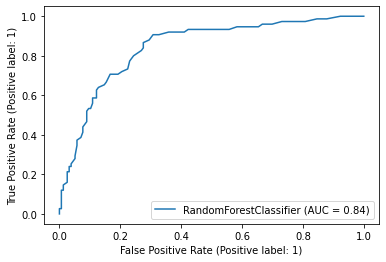

In [30]:
# from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
plot_roc_curve(clf, X_test, y_test);

* print confusion matrix

/Users/lilakelland/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


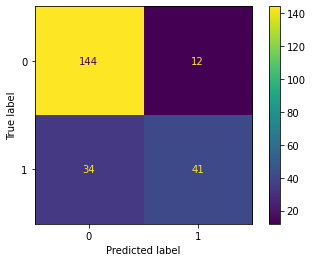

In [66]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf,X_test, y_test)

* print AUC

In [35]:
AUC = metrics.roc_auc_score(y_test, y_pred)

In [36]:
AUC

0.7324358974358974

In [38]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [ ]:
# print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
# print(‘AUC = {:.5f}’.format(roc_auc_score(y_test, test_prob)))
# print(‘Average Precision = {:.5f}‘.format(average_precision_score(y_test, test_prob)))
# print(‘\nUsing 0.5 as threshold:’)
# print(‘Accuracy = {:.5f}’.format(accuracy_score(y_test, test_pred)))
# print(‘Precision = {:.5f}’.format(precision_score(y_test, test_pred)))
# print(‘Recall = {:.5f}’.format(recall_score(y_test, test_pred)))
# print(‘F1 score = {:.5f}‘.format(f1_score(y_test, test_pred)))
# print(‘\nClassification Report’)
# print(classification_report(y_test, test_pred))

----------------------------------
#### Part 2: Using a Grid Search
- import GridSearchCV from sklearn

In [40]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {'n_estimators': [10,100,200], 'max_depth': [1,5,10,20]}


clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X_train, y_train)
best_result = grid_search.best_estimator_
best_result

RandomForestClassifier(max_depth=5, n_estimators=200)

* create grid (optimize for number of trees and max depth in one tree)

In [56]:
grid_search.best_score_

0.752585604472397

In [54]:
print("Best R_squared from elastic net grid search: %.3f"
       % grid_search.score(X_train, y_train))
print(grid_search.best_params_)

Best R_squared from elastic net grid search: 0.855
{'max_depth': 5, 'n_estimators': 200}


* fit training data with grid search

In [ ]:
# see above

In [60]:
# These are best parameters from grid search
clf = RandomForestClassifier(max_depth=5, n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

* print confusion matrix with the best model

/Users/lilakelland/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


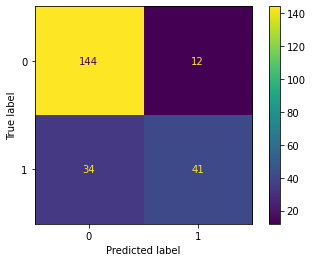

In [65]:
# sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None
confusion = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf,X_test, y_test)

* print AUC with the best model

/Users/lilakelland/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


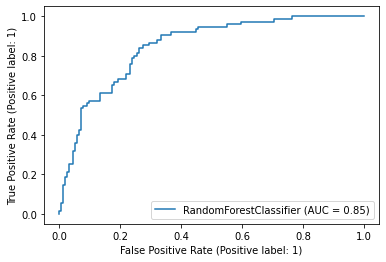

In [62]:
plot_roc_curve(clf, X_test, y_test);

- is the model better than default?

In [ ]:
# yup